In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape,test_images.shape)
np.unique(train_labels,return_counts=True)

(50000, 32, 32, 3) (10000, 32, 32, 3)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [ ]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(train_labels)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D,Dense ,Flatten

num_filters_1 = 6
filter_size_1 = 5
pool_size_1 = 2
num_filters_2 = 16
filter_size_2 = 5

model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(num_filters_1,filter_size_1,activation = 'relu'),
    MaxPooling2D(pool_size=pool_size_1),
    Conv2D(num_filters_2,filter_size_2,activation = 'relu'),
    MaxPooling2D(pool_size=pool_size_1),
    Flatten(),
    Dense(120,activation = 'relu'),
    Dense(84,activation = 'relu'),
    Dense(10,activation = 'softmax'),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(
    SGD(learning_rate=0.0005),
    loss= 'categorical_crossentropy',
    metrics = ['accuracy'],
)
acctemp = model.fit(
    train_images,
    Y_train,
    epochs = 20,
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.1053 - loss: 2.8677
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.1079 - loss: 2.3010
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.1092 - loss: 2.2999
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.1120 - loss: 2.2984
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1183 - loss: 2.2968
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.1237 - loss: 2.2942
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.1399 - loss: 2.2842
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.1630 - loss: 2.2643
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.1840 - loss: 2.2374
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.1925 - loss: 2.2142
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.2064 - loss: 2.1896
Epoch 12

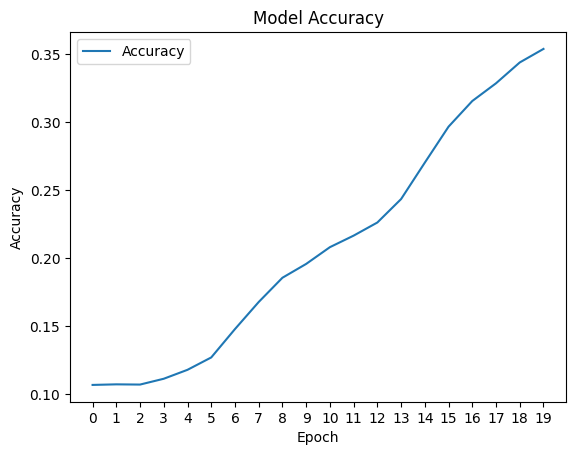

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acctemp.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

epochs = range(0, len(acctemp.history['accuracy']))
plt.xticks(epochs)

plt.legend(loc='upper left')
plt.show()

In [ ]:
acc = model.evaluate (test_images, to_categorical(test_labels))
acc[1]*100


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3256 - loss: 1.8837


32.44999945163727

In [ ]:
from sklearn.metrics import classification_report
target_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
print(classification_report(test_labels,pred,target_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']))
# for i in range(1000):
#     true_label = pred[i]
#     # print(pred[i])
#     print(f"Label: {true_label}, Class name: {target_names[true_label]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.49      0.30      0.37      1000
  automobile       0.36      0.59      0.44      1000
        bird       0.37      0.06      0.10      1000
         cat       0.22      0.21      0.22      1000
        deer       0.28      0.11      0.15      1000
         dog       0.35      0.28      0.31      1000
        frog       0.30      0.60      0.40      1000
       horse       0.28      0.44      0.35      1000
        ship       0.57      0.23      0.33      1000
       truck       0.29      0.44      0.35      1000

    accuracy                           0.32     10000
   macro avg       0.35      0.32      0.30     10000
weighted avg       0.35      0.32      0.30     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


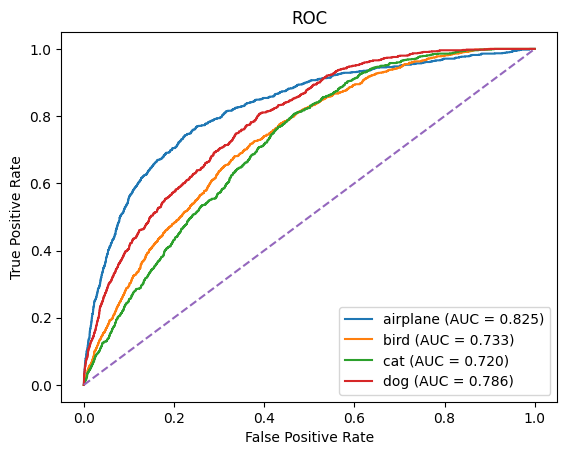

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

num_classes = [0,2,3,5]

pred = model.predict(test_images)

Y_test = to_categorical(test_labels)

fpr = dict()
tpr = dict()

for i in num_classes:
  fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], pred[:, i])
  auc_score = roc_auc_score(Y_test[:, i], pred[:, i])
  plt.plot(fpr[i], tpr[i], label='{0} (AUC = {1:.3f})'.format(target_names[i], auc_score))

plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()


In [ ]:
model.save('cnn_cifar10.keras')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('cnn_cifar10.keras')

pre = loaded_model.predict(test_images)
pre

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[8.29626864e-04, 1.26862293e-02, 3.81918885e-02, ...,
        4.81874198e-01, 1.63426783e-04, 2.65285210e-03],
       [1.85578868e-01, 2.97770381e-01, 1.86918080e-02, ...,
        6.11674506e-03, 9.29494053e-02, 3.88123840e-01],
       [3.15692499e-02, 3.76095802e-01, 1.04670459e-02, ...,
        1.16807953e-01, 7.31475875e-02, 1.78907633e-01],
       ...,
       [6.53345895e-04, 6.32453302e-04, 5.85824177e-02, ...,
        1.05868295e-01, 2.99197854e-04, 5.85833681e-04],
       [1.50445313e-03, 1.54409045e-02, 4.82407473e-02, ...,
        7.86025152e-02, 3.09992814e-04, 2.09413599e-02],
       [6.82153925e-03, 1.99698824e-02, 8.74591768e-02, ...,
        4.00345087e-01, 4.19516629e-03, 2.65655443e-02]], dtype=float32)

# TEST

**PLAY TEST**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'download (1).jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('predict :' ,decode_predictions(preds,top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predict : [('n03297495', 'espresso_maker', 0.17173123), ('n02860847', 'bobsled', 0.092930876), ('n04522168', 'vase', 0.03461581)]
